In [46]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline 

import seaborn as sns

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
housing = pd.read_csv('~/Documents/NYCDSA/Projects/P3. ML Ames/Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [49]:
housing.head(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
8,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
10,908186050,1072,140000,180,RM,35.0,3675,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [50]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [51]:
housing_copy = housing.copy()

In [52]:
housing_copy.drop(columns="PID", inplace=True)

In [53]:
first_col = housing_copy.pop("SalePrice")

In [54]:
housing_copy.insert(0, 'SalePrice', first_col)

In [55]:
housing_copy.describe()

,SalePrice,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2566.000000,...,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,178059.623256,1486.039922,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,...,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,75031.089374,488.650181,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,175.872330,...,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,12789.000000,334.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,129975.000000,1112.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,159900.000000,1436.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,209625.000000,1733.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,158.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,755000.000000,4676.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [56]:
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,...,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,...,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,...,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,...,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [57]:
real_estate = pd.read_csv('~/Documents/NYCDSA/Projects/P3. ML Ames/Ames Real Estate Data.csv', index_col=0)
real_estate.shape

(22213, 90)

In [58]:
real_estate.head()

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4599.0,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4513.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,...,3449.0,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4506.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [59]:
real_estate.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

In [60]:
real_estate[:][:10]

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4599.0,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4513.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,...,3449.0,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4506.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445020,520445020,0,0,4512 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4512.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520450001,520450001,0,0,3448 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,...,3448.0,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520450010,520450010,0,0,4421 EVEREST CIR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4421.0,NaN,EVEREST,CIR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520450020,520450020,0,0,4415 EVEREST CIR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4415.0,NaN,EVEREST,CIR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


AttributeError: module 'matplotlib' has no attribute 'xticks'

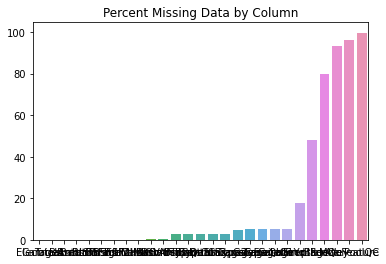

In [61]:
#plot columns by percent null values

def percent_null(housing):
    percentmis = 100* housing.isnull().sum() / len(housing)
    return percentmis
percentmis=percent_null(housing)


percentmis = percentmis[percentmis>0].sort_values()
sns.barplot(x= percentmis.index, y=percentmis).set(title='Percent Missing Data by Column')
plt.xticks(rotation=90)
print(percentmis[percentmis>=20])

In [62]:
housing.isnull().sum().sort_values(axis=0, ascending=False)

PoolQC           2571
MiscFeature      2483
Alley            2412
Fence            2055
FireplaceQu      1241
                 ... 
GrLivArea           0
Heating             0
HeatingQC           0
CentralAir          0
SaleCondition       0
Length: 81, dtype: int64

In [63]:
# find correlation with sales price
corr = housing.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652222
1stFlrSF         0.642613
GarageCars       0.638801
GarageArea       0.634992
YearBuilt        0.544370
FullBath         0.534982
GarageYrBlt      0.520763
YearRemodAdd     0.514309
MasVnrArea       0.500964
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.460792
LotFrontage      0.358577
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.291080
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.167519
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022520
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033802
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
PID             -0.226276
Name: SalePr

<AxesSubplot:>

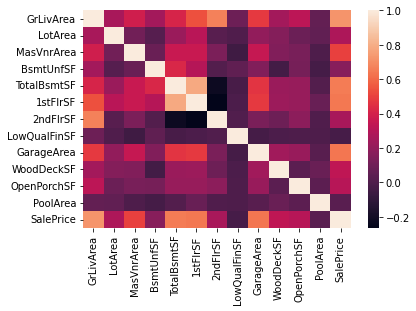

In [64]:
# heat map of columns with "sf" or "area"

size_related = housing.filter(regex='SF$|Area$')
corr = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr)

In [65]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [66]:
#int_col = ["GrLivArea", "SalePrice"]

In [67]:
int_df = housing.select_dtypes(include=('int64', 'float64'))
int_df.head()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,NaN,7890,6,6,1939,1950,...,399.0,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,...,266.0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,...,216.0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,80.0,8146,4,8,1900,2003,...,281.0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,70.0,8400,8,6,2001,2001,...,528.0,0,45,0,0,0,0,0,11,2009


In [68]:
int_df
price = housing["SalePrice"]

In [69]:
# import statsmodels.api as sm
# x = sm.add_constant(int_df)
# model = sm.OLS(np.log(price), x)
# results = model.fit()
# print(results.summary())

AttributeError: module 'matplotlib' has no attribute 'xticks'

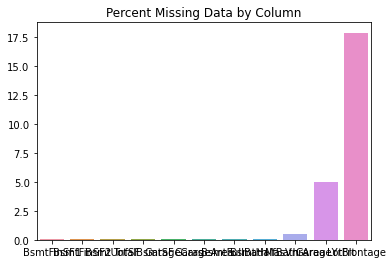

In [70]:
int_missing=percent_null(int_df)


int_missing = int_missing[int_missing>0].sort_values()
sns.barplot(x= int_missing.index, y=int_missing).set(title='Percent Missing Data by Column')
plt.xticks(rotation=90)
print(int_missing[int_missing>=20])

In [71]:
int_missing = int_missing[int_missing>0].sort_values(ascending=False)
int_missing

LotFrontage     17.906977
GarageYrBlt      5.000000
MasVnrArea       0.542636
BsmtFullBath     0.077519
BsmtHalfBath     0.077519
BsmtFinSF1       0.038760
BsmtFinSF2       0.038760
BsmtUnfSF        0.038760
TotalBsmtSF      0.038760
GarageCars       0.038760
GarageArea       0.038760
dtype: float64

In [72]:
col_missing = int_missing.index

In [73]:
int_df.drop(columns=col_missing, inplace=True)

In [74]:
int_df

,PID,GrLivArea,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,7890,6,6,1939,1950,856,...,1,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,4235,5,5,1984,1984,1049,...,0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,6060,5,9,1930,2007,1001,...,0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,8146,4,8,1900,2003,717,...,0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,8400,8,6,2001,2001,810,...,0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,8854,6,6,1916,1950,952,...,1,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,13680,3,5,1955,1955,1733,...,1,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,6270,5,6,1949,1950,1001,...,0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,8826,7,5,2000,2000,985,...,1,193,96,0,0,0,0,0,7,2007


In [45]:
import statsmodels.api as sm
x = sm.add_constant(int_df)
model = sm.OLS(np.log(price), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1546.
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        07:12:41   Log-Likelihood:                 2422.4
No. Observations:                2580   AIC:                            -4791.
Df Residuals:                    2553   BIC:                            -4633.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.1540      2.921      3.477